In [1]:
from datasets import load_titanic, balance_classes
from tools import model_performance, confusion_matrix
from sklearn.metrics import plot_roc_curve
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

In [2]:
df, df_train, df_test = load_titanic()
df_train.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'target'], dtype='object')

In [3]:
original_X = df.drop(['target'], axis=1)
original_y = df['target']
train_X = df_train.drop(['target'], axis=1)
train_y = df_train['target']
test_X = df_test.drop(['target'], axis=1)
test_y = df_test['target']

In [4]:
original_X = pd.get_dummies(original_X)
train_X = pd.get_dummies(train_X)
test_X = pd.get_dummies(test_X)

features = train_X.columns

In [5]:
# kvuli konvergenci
scaler = StandardScaler().fit(train_X)
original_X = scaler.transform(original_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [6]:
model = QuadraticDiscriminantAnalysis()
scores = cross_val_score(model, original_X, original_y, cv=80)
scores.mean()

/Users/tomasmikula/.virtualenvs/fcapy/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/tomasmikula/.virtualenvs/fcapy/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/tomasmikula/.virtualenvs/fcapy/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/tomasmikula/.virtualenvs/fcapy/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/tomasmikula/.virtualenvs/fcapy/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/tomasmikula/.virtualenvs/fcapy/lib/python3.8/site-packages/sklearn/discri

0.7368371212121213

In [7]:
model = QuadraticDiscriminantAnalysis()
model = model.fit(train_X, train_y)

/Users/tomasmikula/.virtualenvs/fcapy/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [8]:
# Lepsi train score, ale pokles v test score
model_performance(model, train_X, train_y, test_X, test_y)

Train score
0.5786516853932584
Test score
0.6493688639551192


In [9]:
confusion_matrix(model.predict(train_X), train_y, model.predict(test_X), test_y)

Train
TN: 98, TP: 5, FN: 74, FP: 1
Test
TN: 441, TP: 22, FN: 241, FP: 9


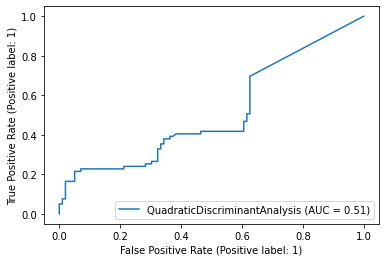

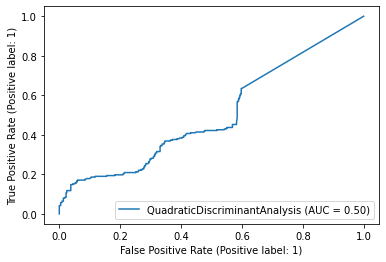

In [10]:
plot_roc_curve(model, train_X, train_y)
plot_roc_curve(model, test_X, test_y)